# California House Price Prediction 

### Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

### Importing Boston Housing Dataset

In [2]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")
train_df = train_df.reindex(np.random.permutation(train_df.index))

In [3]:
print(train_df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
9945     -119.75     36.80                25.0       2718.0           504.0   
7157     -118.32     33.75                37.0       1080.0           135.0   
16104    -122.46     37.79                52.0       2005.0           359.0   
210      -116.42     33.76                14.0      16921.0          2837.0   
6418     -118.26     33.89                36.0        923.0           165.0   
...          ...       ...                 ...          ...             ...   
10448    -120.34     38.25                17.0       5497.0          1056.0   
12412    -121.57     39.74                17.0       1619.0           292.0   
2440     -117.59     33.91                 7.0      10223.0          1491.0   
16431    -122.57     37.99                38.0       5587.0           996.0   
4948     -118.11     34.15                26.0       2193.0           558.0   

       population  households  median_income  media

In [4]:
# checking the number of rows and columns
print(f"Rows = {train_df.shape[0]}")
print(f"Columns = {train_df.shape[1]}")

Rows = 17000
Columns = 9


In [5]:
# check for missing values in each column
train_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [6]:
# statistical measures of the dataset
train_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Normalizing The values

In [7]:
# Calculate the Z-scores of each column in the training set and
# write those Z-scores into a new pandas DataFrame named train_df_norm.
train_df_mean = train_df.mean()
train_df_std = train_df.std()
train_df_norm = (train_df - train_df_mean)/train_df_std

# Examine some of the values of the normalized training set. Notice that most 
# Z-scores fall between -2 and +2.
train_df_norm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
9945,-0.093704,0.549644,-0.285165,0.034100,-0.084012,-0.150345,-0.094200,-0.812448,-1.006183
7157,0.619454,-0.877364,0.668204,-0.717295,-0.959458,-0.926577,-0.934207,4.079394,2.523630
16104,-1.445213,1.012836,1.859916,-0.292972,-0.428021,-0.507534,-0.377670,0.114939,2.523630
210,1.567006,-0.872685,-1.159087,6.549396,5.450990,0.953455,1.978509,1.962377,1.158775
6418,0.649377,-0.811862,0.588757,-0.789315,-0.888283,-0.720104,-0.806775,-0.165017,-0.746664


In [8]:
# Calculate the Z-scores of each column in the test set and
# write those Z-scores into a new pandas DataFrame named test_df_norm.
test_df_mean = test_df.mean()
test_df_std  = test_df.std()
test_df_norm = (test_df - test_df_mean)/test_df_std
test_df_norm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.233523,0.814497,-0.146975,0.596319,0.315284,0.130224,0.317681,1.510494,1.227494
1,0.646236,-0.645823,1.127377,-0.505466,-0.529167,-0.576200,-0.582646,-0.112305,-0.259427
2,0.891858,-0.871210,-0.146975,0.459002,-0.055216,0.078795,0.013924,1.070971,0.571551
3,0.616160,-0.852428,-0.067328,-1.174887,-1.238892,-1.313675,-1.310570,1.255656,1.097543
4,-0.040503,0.326159,-0.784152,-0.630257,-0.687953,-0.536415,-0.692108,-0.469003,-1.097477


### Create a binary label

In [9]:
threshold_in_Z = 1.0 
train_df_norm["median_house_value_is_high"] = (train_df_norm["median_house_value"] > threshold_in_Z).astype(float)
test_df_norm["median_house_value_is_high"] = (test_df_norm["median_house_value"] > threshold_in_Z).astype(float) 
train_df_norm["median_house_value_is_high"].head(8000)

9945     0.0
7157     1.0
16104    1.0
210      1.0
6418     0.0
        ... 
14222    0.0
62       0.0
14926    0.0
14622    0.0
16531    0.0
Name: median_house_value_is_high, Length: 8000, dtype: float64

### Understanding the correlation between various features in the dataset


1. Positive Correlation
2. Negative Correlation

In [10]:
correlation = train_df.corr()

<AxesSubplot:>

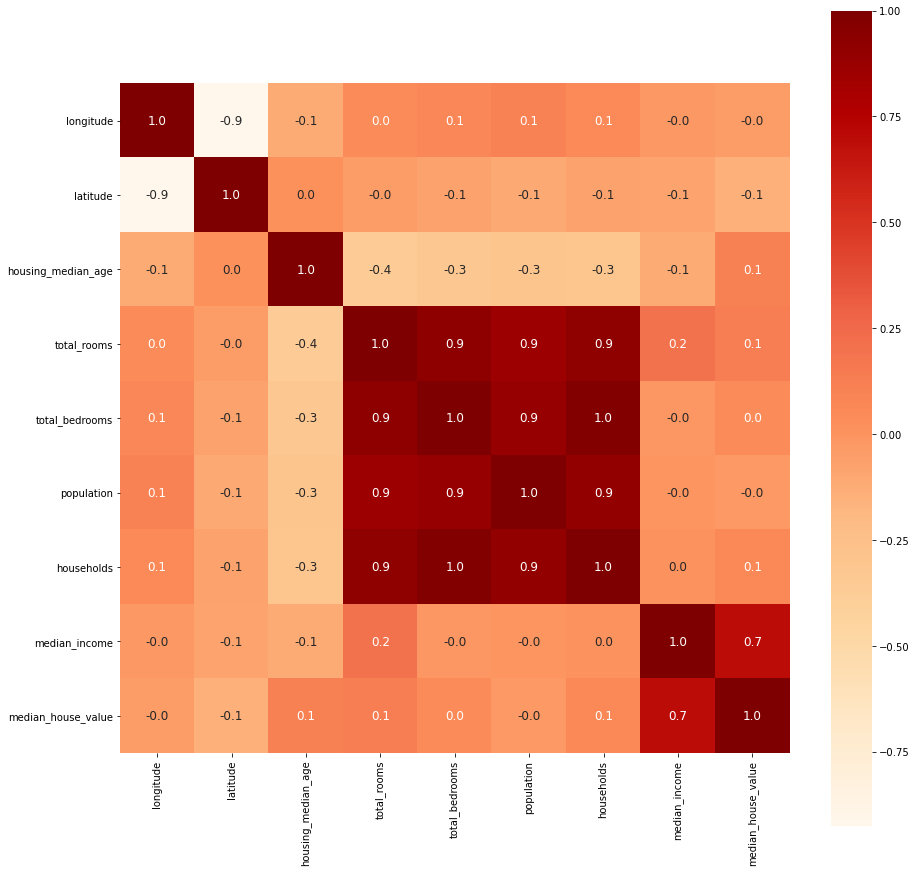

In [11]:
# constructiong a heatmap to understand the correlation between columns
plt.figure(figsize = (15, 15))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':12}, cmap='OrRd')

### Splitting the data and Target

In [12]:
X_train = train_df_norm
Y_train = train_df['median_house_value']

X_test = test_df_norm
Y_test = test_df['median_house_value']

In [13]:
# checking the number of rows and columns for Trainig and Testing DataSets
print(f"Training (Rows={X_train.shape[0]},columns={X_train.shape[1]})")
print(f"Testing (Rows={X_test.shape[0]}, columns={X_test.shape[1]})")

Training (Rows=17000,columns=10)
Testing (Rows=3000, columns=10)


### Model Training

#### XGBoost Regressor

In [14]:
# Loading the model
model = XGBRegressor()

In [15]:
# training the model with X_train
model.fit(train_df_norm, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Evaluation

#### Prediction on training data

In [16]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [18]:
# R squared error 
score_1 = metrics.r2_score(Y_train, training_data_prediction)


# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

# Precision
score_3 = metrics.precision(Y_train, training_data_prediction)

print(score_1)
print(score_2)
print(score_3)

AttributeError: module 'sklearn.metrics' has no attribute 'precision'

### Visualizeing the actual Prices and predicted prices for training data

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

#### Prediction on test data

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
# R squared error 
score_1 = metrics.r2_score(Y_test, test_data_prediction)


# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print(score_1)
print(score_2)

### Visualizeing the actual Prices and predicted prices for Testing data

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()